In [18]:
from python_imports import *

In [23]:
# Load data.
import_path = r'..\datasets\clean_train.csv'
# Dataset contains NA strings that should not be considered null values.
data = pd.read_csv(import_path, keep_default_na=False, na_values=[''])
df = pd.DataFrame(data)

In [24]:
df.head()

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,...,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type,saleprice
0,109,533352170,60,RL,0.0,13517,Pave,NA,IR1,Lvl,...,0,0,NA,NA,NA,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NA,IR1,Lvl,...,0,0,NA,NA,NA,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NA,Reg,Lvl,...,0,0,NA,NA,NA,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NA,Reg,Lvl,...,0,0,NA,NA,NA,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,NA,IR1,Lvl,...,0,0,NA,NA,NA,0,3,2010,WD,138500


In [20]:
def subplot_dist(df, kind='dist', cols=None, titles=None, xlabels=None, ylabels=None, meanline=False, medianline=False, **kwargs):
    # Accepts all columns if they can be converted to numbers if cols argument
    # is not given.
    if not cols:
        cols = []
        for col in df.columns:
            try:
                df[col] = pd.to_numeric(df[col])
                cols.append(col)
            except ValueError:
                pass

    # Sets number of figure rows based on number of DataFrame columns.
    if len(cols) > 4:
        ncols = 3
        nrows = int(np.ceil(len(cols)/3))
    else:
        ncols = 2
        nrows = int(np.ceil(len(cols)/2))
    # Sets figure size based on number of figure rows.
    fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=(16, 5*nrows))
    # Makes the list of lists flat.
    ax = ax.ravel()

    for i, col in enumerate(cols):
        is_list = isinstance(col, (list, tuple))
        if is_list and kind != 'box':
            print('distplot does not plot multiple series in one graph.')
            continue
        if kind == 'dist':
            sb.distplot(df[col], ax=ax[i], **kwargs)
            if meanline:
                ax[i].axvline(np.mean(df[col]), color='r', linestyle='-', linewidth=1)
            if medianline:
                ax[i].axvline(np.median(df[col]), color='purple', linestyle='--', linewidth=1)
        # Boxplotting option.
        elif kind == 'box':
            sb.boxplot(data=df[col], ax=ax[i], **kwargs)
            if not is_list and meanline:
                ax[i].axhline(np.mean(df[col]), color='r', linestyle='-', linewidth=1)

        if titles:
            ax[i].set_title(titles[i])
        if xlabels:
            ax[i].set_xlabel(xlabels[i])
        if ylabels:
            ax[i].set_ylabel(ylabels[i])

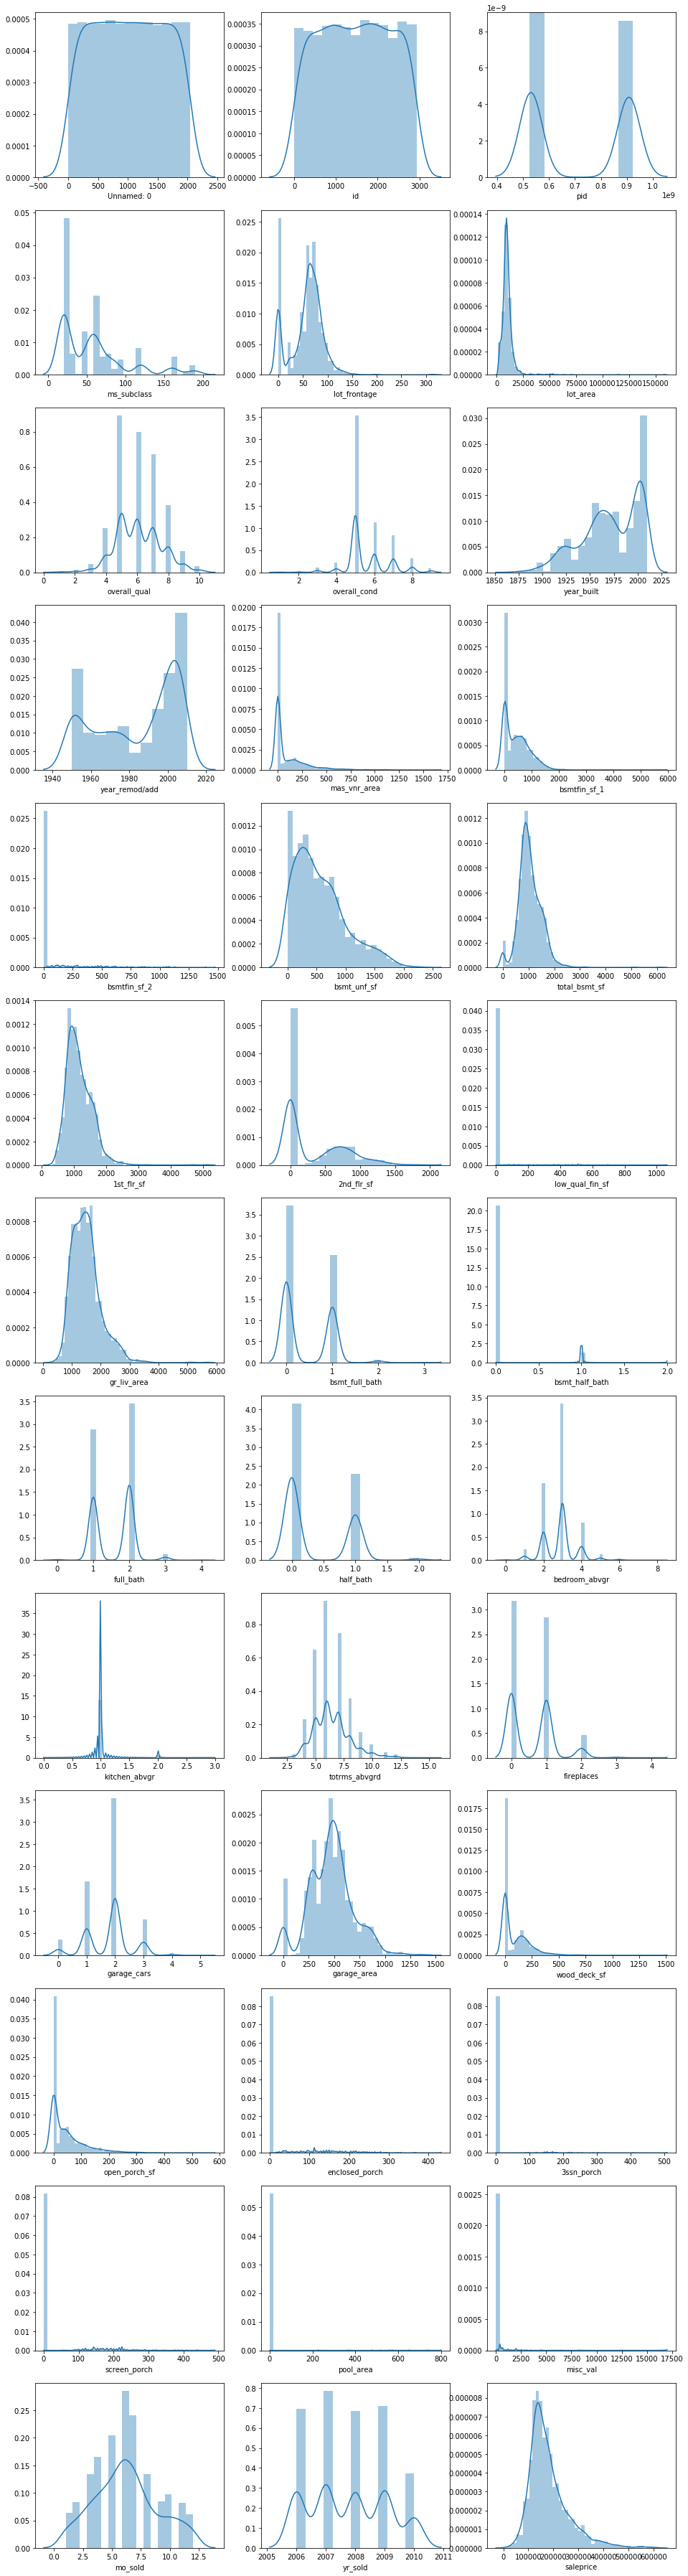

In [21]:
subplot_dist(df)